In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

cdict = {'red'  :  ((0., 0., 0.), (0.2, 1., 1.), (0.6, 1., 1.), (1., 0., 0.)),
         'green':  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 1., 1.), (1., 1., 1.)),
         'blue' :  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 0., 0.), (1., 0., 0.))}

my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

In [2]:
# data = pd.read_csv('crop_data_Newport.csv') #changed .csv here
data = pd.read_csv('Data/Probe_Data/step_008.csv',
                   names = ["PROBE_ID","SAMPLE_DATE", "LAT", "LONG", "HEADING",\
                           "SPEED","PROBE_DATA_PROVIDER","X","Y", "LOCAL_TIME"])
#Newport data is here: https://drive.google.com/open?id=1hIIFrDH2Y8MRH_95lgRx2iiQxls9G1pf
data.sort_values(by='SAMPLE_DATE', inplace=True, ascending=True) # This now sorts in date order
data.head()

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
564,33E9A802-F2AC-4D2E-A67F-0DA7010CBEC0,2018-07-02 00:00:00,33.620078,-117.929563,24.0,59.0,CONSUMER14,413775.118525,3.720420e+06,2018-07-01 17:00:00 -0700
54,33E9A802-F2AC-4D2E-A67F-0DA7010CBEC0,2018-07-02 00:00:01,33.620196,-117.929495,29.0,58.0,CONSUMER14,413781.543850,3.720433e+06,2018-07-01 17:00:01 -0700
462,33E9A802-F2AC-4D2E-A67F-0DA7010CBEC0,2018-07-02 00:00:02,33.620341,-117.929302,17.0,58.0,CONSUMER14,413799.591224,3.720449e+06,2018-07-01 17:00:02 -0700
461,33E9A802-F2AC-4D2E-A67F-0DA7010CBEC0,2018-07-02 00:00:03,33.620504,-117.929254,15.0,57.0,CONSUMER14,413804.206081,3.720467e+06,2018-07-01 17:00:03 -0700
460,33E9A802-F2AC-4D2E-A67F-0DA7010CBEC0,2018-07-02 00:00:04,33.620661,-117.929210,15.0,56.0,CONSUMER14,413808.443903,3.720484e+06,2018-07-01 17:00:04 -0700


In [3]:
print('unique data provider count',len(data.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data.PROBE_ID.unique()))
print('unique time',len(data.LOCAL_TIME.unique()))
print('raw data shape',data.shape)
# - Got 18 unique IDs vs 21 in the other set

unique data provider count 13
unique Probe_ID count 608
unique time 19823
raw data shape (25122, 10)


In [4]:
## I think this is where the Newport data is filtered out, in the original .csv the raw data shape is 40,11 here now it is 0,11
t1_series = data[data.LOCAL_TIME == '2018-06-01 16:49:26 -0700' ]
t1_series.head()
print('raw data shape',t1_series.shape)

# t2_series = data[data.LOCAL_TIME.isin'2018-06-01 16:49:26 -0700' ]
# print('raw data shape',t1_series.shape)

raw data shape (0, 10)


In [5]:
# Trajectory
ID_series = data[data.PROBE_ID == '19793987'] #'24046157' ] - I changed to pick a probe ID from the data list, but did not find anything still
ID_series.head()
print('raw data shape',ID_series.shape)

fleet_series = data[data.PROBE_DATA_PROVIDER == 'FLEET51' ]

print('raw data shape',fleet_series.shape)




raw data shape (0, 10)
raw data shape (3352, 10)


# to set specific regions of interest
intersection_center = data[data['edge_id'].isin(intersection_center_edges)]

In [6]:
def pos_heatmap(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

    scatter = ax.scatter(data['X'].values,
                               data['Y'].values)
    scatter_heat = ax.scatter(data['X'].values,
                               data['Y'].values,
                               c=data['SPEED'], s=45, alpha=0.9,cmap=my_cmap)
    cbar = fig.colorbar(scatter_heat)
    cbar.set_label("Speed (m/s)",fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()   

def route_map(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))
    scatter = ax.plot(data['X'].values, data['Y'].values)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show() 
    
def mean_speed(data,title):
    plt.figure(figsize = (14,10))
    sns.lineplot(x=data['time'],y=data['speed'])
    plt.title(title,fontsize=25)
    plt.xlabel('Time (s)',fontsize=20)
    plt.ylabel('Mean Speed (m/s)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [7]:
ID_series

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME


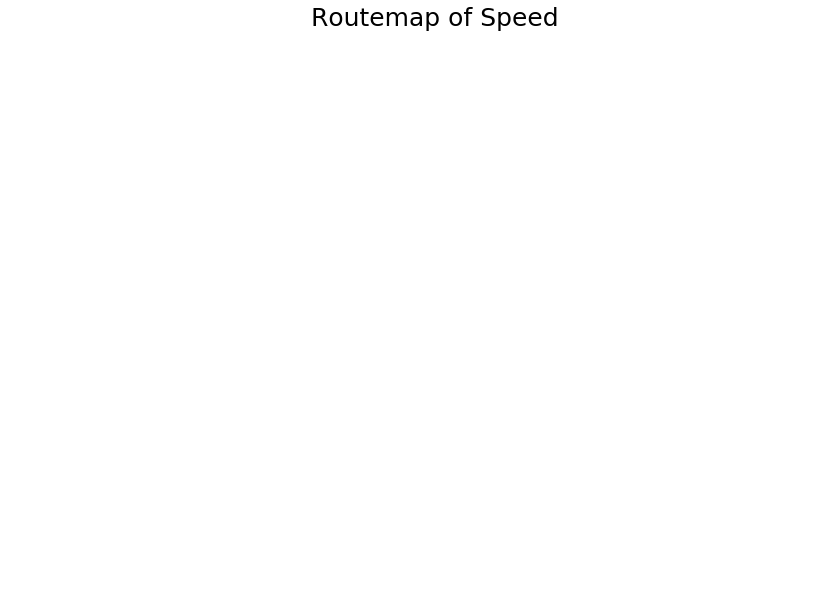

In [8]:
ax = route_map(ID_series,'Routemap of Speed') #Changed to routemap from heatmap

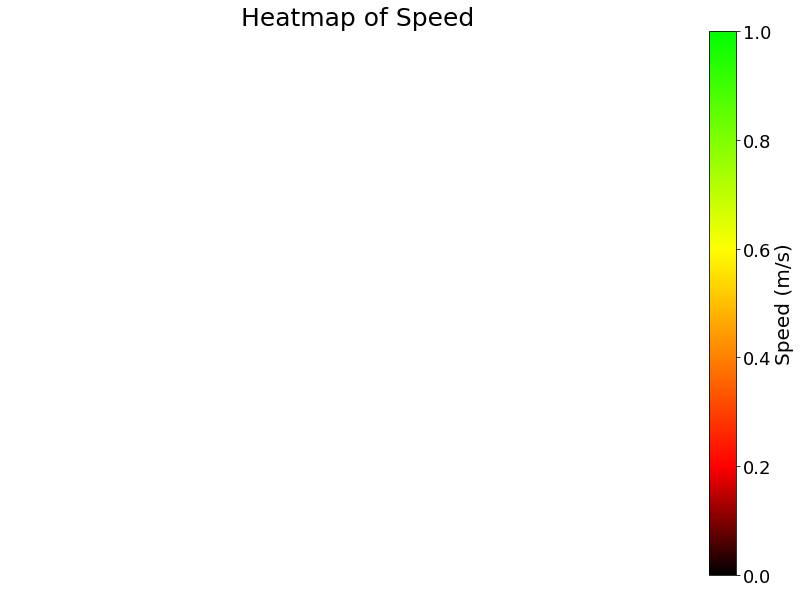

In [9]:
ax = pos_heatmap(ID_series,'Heatmap of Speed')

# Calculate Populations and Speeds in Each Area

In [10]:
import geopandas as gpd
import folium
from shapely.geometry import Polygon, Point, LineString
from datetime import datetime

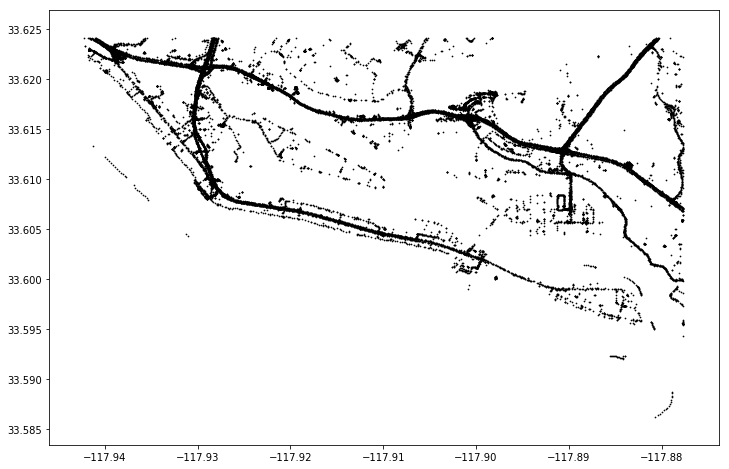

In [11]:
plt.figure(figsize = (12,8))
plt.scatter(data.LONG, data.LAT, s = 0.5, c = 'k')
plt.show()

In [12]:
# Read shape files into geopandas
right_half_tri_SF = gpd.read_file("shapefiles/right_half_triangle/right_half_triangle.shp")[['Name', 'geometry']]
left_half_tri_SF = gpd.read_file("shapefiles/left_half_triangle/left_half_triangle.shp")[['Name', 'geometry']]
island_SF = gpd.read_file("shapefiles/island/island.shp")[['Name', 'geometry']]
newport_SF = gpd.read_file("shapefiles/inundation_map/inundation_map.shp")[['Name', 'geometry']]
# Read Street Shape Files
balboa_blvd = gpd.read_file("shapefiles/Streets/Balboa/Balboa_Blvd-polygon.shp")[['Name', 'geometry']]
w_balboa_blvd = gpd.read_file("shapefiles/Streets/W_Balboa/W_Balboa-polygon.shp")[['Name', 'geometry']]
newport = gpd.read_file("shapefiles/Streets/Newport/Newport_Blvd-polygon.shp")[['Name', 'geometry']]

In [13]:
shape_df = right_half_tri_SF.append([left_half_tri_SF, island_SF,newport_SF])

In [14]:
# Turn coordinates into points
def create_point(row):
    return Point(row['LONG'],row['LAT'])

In [15]:
data['coord'] = data.apply(create_point, axis=1)
data['section'] = 'N/A'

In [16]:
section = []

for i in data.index.values:
    if right_half_tri_SF['geometry'][0].contains(data['coord'][i]):
        section.append('right_half_tri')
    elif left_half_tri_SF['geometry'][0].contains(data['coord'][i]):
        section.append('left_half_tri')
    elif island_SF['geometry'][0].contains(data['coord'][i]):
        section.append('island')
    elif newport_SF['geometry'][0].contains(data['coord'][i]):
        section.append('rest_of_new_port')
    else:
        section.append('N/A')
        
data['section'] = section

In [17]:
street = []

for i in data.index.values:
    if balboa_blvd['geometry'][0].contains(data['coord'][i]):
        street.append('balboa')
    elif w_balboa_blvd['geometry'][0].contains(data['coord'][i]):
        street.append('w_balboa')
    elif newport['geometry'][0].contains(data['coord'][i]):
        street.append('newport')
    else:
        street.append('N/A')
        
data['street'] = street

In [18]:
data_cleaned = data[data.section != 'N/A'][['PROBE_ID','LAT','LONG',\
                                            'HEADING',\
                                            'SPEED',\
                                            'PROBE_DATA_PROVIDER',\
                                            'LOCAL_TIME',\
                                            'coord',\
                                            'section','street']]

In [19]:
data_test = data_cleaned.loc[data_cleaned['PROBE_DATA_PROVIDER'] == "CONSUMER21"]

In [20]:
data_test = data_test[data_test.SPEED != 0]


In [21]:
np.mean(data_test["SPEED"])

18.97834274952919

In [22]:
data_test

,PROBE_ID,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,LOCAL_TIME,coord,section,street
307,3fd3363b7ec448d8aabd3d1f913d43f3,33.60822,-117.92847,216.0,3.0,CONSUMER21,2018-07-01 17:03:33 -0700,POINT (-117.92847 33.60822),rest_of_new_port,N/A
273,3fd3363b7ec448d8aabd3d1f913d43f3,33.60815,-117.92840,138.0,4.0,CONSUMER21,2018-07-01 17:03:38 -0700,POINT (-117.9284 33.60815),rest_of_new_port,N/A
315,326f9d71e0ab4618ba5edb1f42b9237a,33.60394,-117.90968,100.0,4.0,CONSUMER21,2018-07-01 17:04:43 -0700,POINT (-117.90968 33.60394),rest_of_new_port,N/A
644,7081bb9436e448c7bfef740cf2576a50,33.60231,-117.89914,291.0,10.0,CONSUMER21,2018-07-01 17:10:14 -0700,POINT (-117.89914 33.60231),rest_of_new_port,N/A
180,7081bb9436e448c7bfef740cf2576a50,33.60254,-117.89931,314.0,16.0,CONSUMER21,2018-07-01 17:10:19 -0700,POINT (-117.89931 33.60254),rest_of_new_port,N/A
476,7081bb9436e448c7bfef740cf2576a50,33.60270,-117.89956,311.0,18.0,CONSUMER21,2018-07-01 17:10:24 -0700,POINT (-117.89956 33.6027),rest_of_new_port,N/A
179,7081bb9436e448c7bfef740cf2576a50,33.60280,-117.89968,307.0,13.0,CONSUMER21,2018-07-01 17:10:28 -0700,POINT (-117.89968 33.6028),rest_of_new_port,N/A
475,7081bb9436e448c7bfef740cf2576a50,33.60307,-117.90044,294.0,13.0,CONSUMER21,2018-07-01 17:10:44 -0700,POINT (-117.90044 33.60307),rest_of_new_port,N/A
178,7081bb9436e448c7bfef740cf2576a50,33.60308,-117.90060,291.0,13.0,CONSUMER21,2018-07-01 17:10:49 -0700,POINT (-117.9006 33.60308),rest_of_new_port,N/A
474,7081bb9436e448c7bfef740cf2576a50,33.60312,-117.90076,289.0,13.0,CONSUMER21,2018-07-01 17:10:53 -0700,POINT (-117.90076 33.60312),rest_of_new_port,N/A


In [23]:
print('unique data provider count',len(data_cleaned.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data_cleaned.PROBE_ID.unique()))
print('unique time',len(data_cleaned.LOCAL_TIME.unique()))
print('raw data shape',data_cleaned.shape)

unique data provider count 12
unique Probe_ID count 198
unique time 6633
raw data shape (7264, 10)


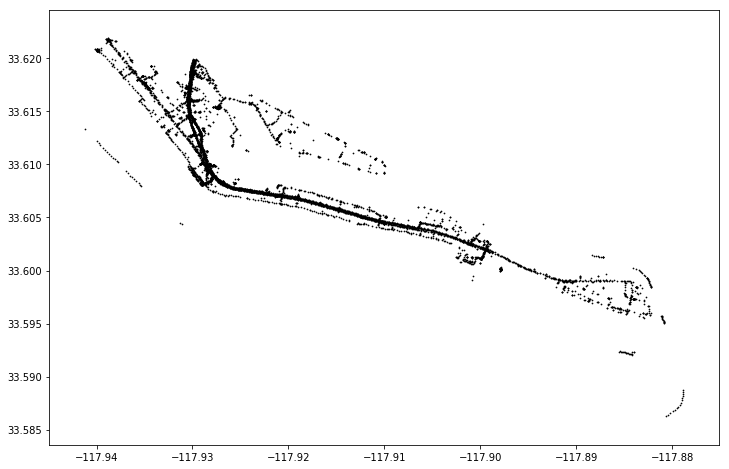

In [24]:
plt.figure(figsize = (12,8))
plt.scatter(data_cleaned.LONG, data_cleaned.LAT, s = 0.5, c = 'k')
plt.show()

## Unique Probes per area

In [25]:
rht_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'right_half_tri'].PROBE_ID.unique()
lht_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'left_half_tri'].PROBE_ID.unique()
isl_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'island'].PROBE_ID.unique()
rest_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'rest_of_new_port'].PROBE_ID.unique()

In [26]:
data_cleaned['LOCAL_TIME'] = pd.to_datetime(data_cleaned['LOCAL_TIME']).dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
# Separate to hours
data_cleaned['HOUR'] = data_cleaned['LOCAL_TIME'].dt.hour  

# For calcualting heading related info on Balboa and Newport

In [27]:
# To make life easier when dealing with headings
heading_fixed = []
for i in data_cleaned.index.values:
    if data_cleaned['HEADING'][i] >180:
        heading_fixed.append(-(360 - data_cleaned['HEADING'][i]))
    else:
        heading_fixed.append(data_cleaned['HEADING'][i])

In [28]:
data_cleaned['HEADING_FIXED'] = heading_fixed

In [29]:
balboa_df = data_cleaned.loc[data_cleaned['street']=='balboa'].copy()
newport_df = data_cleaned.loc[data_cleaned['street']=='newport'].copy()

## Notes
- For vehicle speeds, assume all 0 speeds means stopping at a light and is ignored

## Headings
- Uses fixed headings
### For Newport
- Northbound: -90 <= heading <= 45
- Southbound: 145 <= heading <= -150

### For Balboa
- Northbound: -140 <= heading <= 0
- Sounthbound: 90 <= heading <= -160





In [30]:
def get_heading_info(df, lower_head, upper_head):
    
    '''
    Inputs:
        df - cleaned up dataframe with hours and streets 
        lower_head - lower heading limits for traffic
        upper_head - upper heading limits for traffic
        
    Outputs:
        head_speed - list of 24 north heading speeds averaged over an hour
        head_unique_probe_vehicle - list of 24 counts of unique probe ids in that hour - vehicles
        head_unique_probe_ped - list of 24 counts of unique probe ids in that hour - pedestrian
    '''
    head_speed_veh = []
    head_speed_ped = []
    head_unique_probe_vehicle = []
    head_unique_probe_ped = []
    
    
    for i in range(24):
        head_df = df.loc[(df['HOUR']==i) & \
                         ((df['HEADING_FIXED'] >= lower_head) | \
                         (df['HEADING_FIXED'] <= upper_head))][['PROBE_ID','SPEED']]
        
        head_df = head_df[head_df['SPEED'] != 0]
        unique_probe_list = list(set(head_df['PROBE_ID']))

        ped_count = 0
        veh_count = 0
        ped_speed = []
        veh_speed = []
        for j in unique_probe_list:

            probe_df = head_df.loc[head_df['PROBE_ID'] == j]
            mean_speed = np.mean(probe_df['SPEED'])
            
            if mean_speed <= 15:
                ped_count += 1
                ped_speed.append(mean_speed)
                
            else:
                veh_count += 1
                veh_speed.append(mean_speed)
        
        head_unique_probe_vehicle.append(veh_count)
        head_unique_probe_ped.append(ped_count)
        
        if not ped_speed:
            head_speed_ped.append([])
        else:
            head_speed_ped.append(np.mean(ped_speed))
            
        if not veh_speed:
            head_speed_veh.append([])
        else:
            head_speed_veh.append(np.mean(veh_speed))
        
    return head_speed_veh, head_speed_ped, head_unique_probe_vehicle, head_unique_probe_ped
    

In [31]:
#Balboa
bal_north_limits = [-90,45]
bal_south_limits = [145,-150]
balboa_north_speed_veh, balboa_north_speed_ped, balboa_north_unique_veh,balboa_north_unique_ped  = get_heading_info(balboa_df,\
                                                           bal_north_limits[0],\
                                                           bal_north_limits[1])
balboa_south_speed_veh, balboa_south_speed_ped,balboa_south_unique_veh,balboa_south_unique_ped  = get_heading_info(balboa_df,\
                                                           bal_south_limits[0],\
                                                           bal_south_limits[1])

# Newport
newport_north_limits = [-140,0]  
newport_south_limits = [90,-160]
newport_north_speed_veh, newport_north_speed_ped, newport_north_unique_veh, newport_north_unique_ped = get_heading_info(newport_df,\
                                                             newport_north_limits[0],\
                                                             newport_north_limits[1])
newport_south_speed_veh, newport_south_speed_ped, newport_south_unique_veh, newport_south_unique_ped = get_heading_info(newport_df,\
                                                             newport_south_limits[0],\
                                                             newport_south_limits[1])

In [32]:
# Create a dataframe of road information per hour
road_info_df = pd.DataFrame({'Hour':range(0,24),\
                'Newport_North_Speed_Veh':newport_north_speed_veh,\
                'Newport_South_Speed_Veh':newport_south_speed_veh,\
                'Newport_North_Probe_Veh':newport_north_unique_veh,\
                'Newport_South_Probe_Veh':newport_south_unique_veh,\
                'Newport_North_Speed_Ped':newport_north_speed_ped,\
                'Newport_South_Speed_Ped':newport_south_speed_ped,\
                'Newport_North_Probe_Ped':newport_north_unique_ped,\
                'Newport_South_Probe_Ped':newport_south_unique_ped,\
                             
                'Balboa_North_Speed_Veh':balboa_north_speed_veh,\
                'Balboa_South_Speed_Veh':balboa_south_speed_veh,\
                'Balboa_North_Probe_Veh':balboa_north_unique_veh,\
                'Balboa_South_Probe_Veh':balboa_south_unique_veh,\
                'Balboa_North_Speed_Ped':balboa_north_speed_ped,\
                'Balboa_South_Speed_Ped':balboa_south_speed_ped,\
                'Balboa_North_Probe_Ped':balboa_north_unique_ped,\
                'Balboa_South_Probe_Ped':balboa_south_unique_ped})



In [33]:
road_info_df

,Hour,Newport_North_Speed_Veh,Newport_South_Speed_Veh,Newport_North_Probe_Veh,Newport_South_Probe_Veh,Newport_North_Speed_Ped,Newport_South_Speed_Ped,Newport_North_Probe_Ped,Newport_South_Probe_Ped,Balboa_North_Speed_Veh,Balboa_South_Speed_Veh,Balboa_North_Probe_Veh,Balboa_South_Probe_Veh,Balboa_North_Speed_Ped,Balboa_South_Speed_Ped,Balboa_North_Probe_Ped,Balboa_South_Probe_Ped
0,0,[],[],0,0,3,[],1,0,[],[],0,0,[],[],0,0
1,1,59,[],1,0,[],[],0,0,[],[],0,0,[],[],0,0
2,2,30.6404,28.6533,3,3,14,14,1,1,[],[],0,0,[],[],0,0
3,3,41.8428,41.8428,1,1,[],[],0,0,59.5456,59.5456,1,1,[],[],0,0
4,4,37.3747,49,2,1,9.25371,9.65604,1,1,[],[],0,0,1.60934,[],1,0
5,5,39.7367,26.9564,3,2,10.1925,[],1,0,[],[],0,0,6.11549,4.82802,1,1
6,6,38.5862,39.4382,8,7,6.5,1,1,1,43.9134,56.3269,2,1,8.0467,8.0467,2,1
7,7,26.3672,28.0964,5,4,[],[],0,0,20.1167,[],1,0,[],[],0,0
8,8,31.4351,30.4,7,5,8.21868,8.5,4,2,46.9214,[],2,0,9.65604,9.65604,1,1
9,9,34.6993,33.4879,8,6,9.52335,10.0234,2,2,25.842,23.4559,5,3,5.875,1.5,2,1


# Find Residents

In [34]:
data_cleaned.head()

,PROBE_ID,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,LOCAL_TIME,coord,section,street,HOUR,HEADING_FIXED
563,18274272,33.606906,-117.919411,281.0,16.0,FLEET51,2018-07-01 17:00:59-07:00,POINT (-117.9194113 33.60690579999999),rest_of_new_port,w_balboa,17,-79.0
445,18274272,33.607024,-117.920146,0.0,0.0,FLEET51,2018-07-01 17:02:29-07:00,POINT (-117.9201456 33.607024),rest_of_new_port,w_balboa,17,0.0
504,18274272,33.607087,-117.920380,281.0,18.0,FLEET51,2018-07-01 17:02:45-07:00,POINT (-117.9203801 33.6070871),rest_of_new_port,w_balboa,17,-79.0
307,3fd3363b7ec448d8aabd3d1f913d43f3,33.608220,-117.928470,216.0,3.0,CONSUMER21,2018-07-01 17:03:33-07:00,POINT (-117.92847 33.60822),rest_of_new_port,N/A,17,-144.0
273,3fd3363b7ec448d8aabd3d1f913d43f3,33.608150,-117.928400,138.0,4.0,CONSUMER21,2018-07-01 17:03:38-07:00,POINT (-117.9284 33.60815),rest_of_new_port,N/A,17,138.0


In [38]:
res_data = data_cleaned.loc[data_cleaned['street'] == "N/A"]

In [39]:
uniqe_res_probe = list(set(data_cleaned["PROBE_ID"]))

In [43]:
speed_list = []
for i in uniqe_res_probe:
    speed = np.mean(res_data.loc[res_data["PROBE_ID"]==i]["SPEED"])
    if speed == 0:
        speed_list.append(speed)

In [45]:
len(speed_list)

12